In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1- first question - tweet data:

In [4]:
df = pd.read_csv("Tweets.csv",on_bad_lines='skip')

In [5]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


['negative' 'neutral' 'positive']


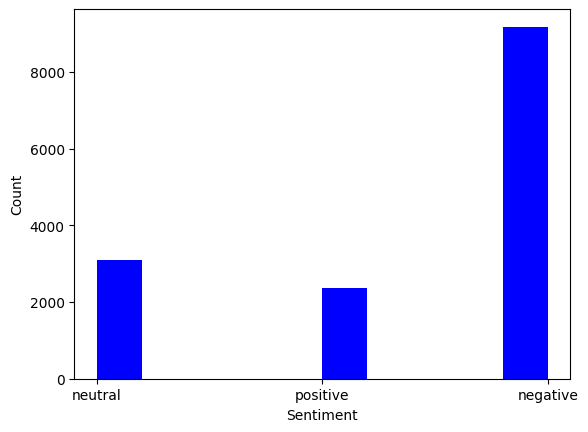

In [6]:
unique_sentiment = np.sort(df["airline_sentiment"].unique())
print(unique_sentiment)

figure = plt.figure()
plt.hist(df["airline_sentiment"],color='blue')
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [35]:
df["Month"] = pd.to_datetime(df["tweet_created"]) #converting the values in the "tweet_created" column to datetime format.

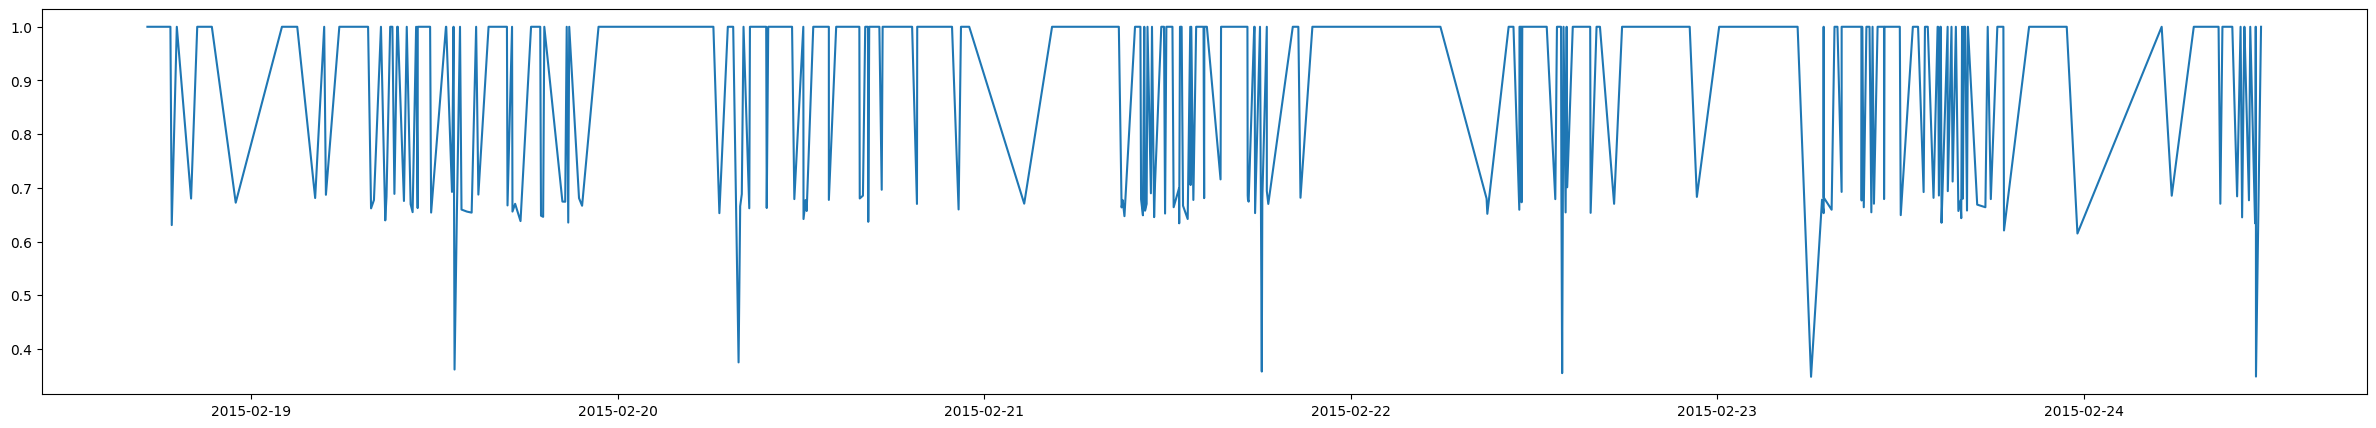

In [34]:
_ = plt.figure(figsize=(30, 5))

plt.plot(df["Month"][:400], df["airline_sentiment_confidence"][:400])
plt.show()

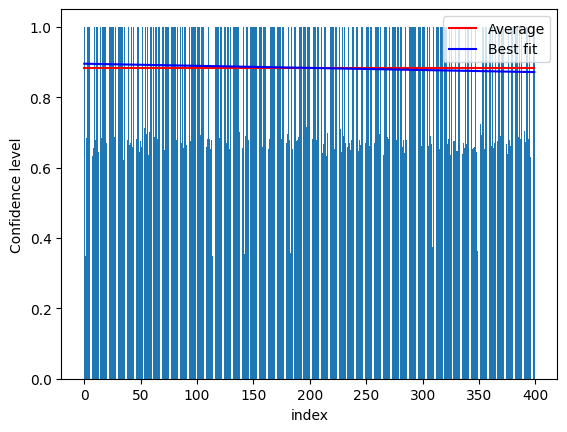

0.8829742500000001


In [25]:
import scipy.stats as sp
from sklearn.linear_model import LinearRegression
#creating list to calculate the average for the first 400 values in airline_sentiment_confidence
avgr=[]
labels = np.arange(0,len(df["airline_sentiment_confidence"][:400]))
#stores the average confidence level for the first 400 data
for i in range(400):
  avgr.append(df["airline_sentiment_confidence"][:400].mean())

#creating a linear regression model and fitting the model to the data
x_fit = np.array(labels).astype(int).reshape(-1, 1)
y_fit = np.array(df["airline_sentiment_confidence"][:400])
model = LinearRegression()
model.fit(x_fit, y_fit)
y_pred = model.predict(x_fit)

#doing the plot
fig = plt.figure()
plt.bar(labels,df["airline_sentiment_confidence"][:400])
plt.plot(labels,avgr, label="Average", c="Red")
plt.plot(x_fit,y_pred, label="Best fit", c="blue")
plt.xlabel('index')
plt.ylabel("Confidence level")
plt.legend()
plt.show()

print (df["airline_sentiment_confidence"][:400].mean())

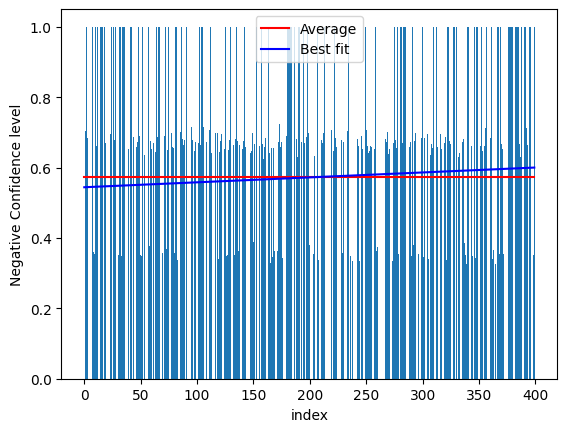

0.5719087500000001


In [36]:
import scipy.stats as sp
from sklearn.linear_model import LinearRegression
df2=df["negativereason_confidence"]
df2=df2.dropna(axis=0) #cleaning the table

avgr=[]
labels = np.arange(0,len(df2[:400]))

for i in range(400):
  avgr.append(df2[:400].mean())

x_fit = np.array(labels).astype(int).reshape(-1, 1)
y_fit = np.array(df2[:400])
model = LinearRegression()
model.fit(x_fit, y_fit)
y_pred = model.predict(x_fit)


fig = plt.figure()
plt.bar(labels,df2[:400])
plt.plot(labels,avgr, label="Average", c="red")
plt.plot(x_fit,y_pred, label="Best fit", c="blue")
plt.xlabel('index')
plt.ylabel("Negative Confidence level")
plt.legend()
plt.show()
print (df2[:400].mean())

# second question - crime data :

In [ ]:
df = pd.read_csv("Incidents_Offenses_Victims_and_Known_Offenders_by_Offense_Category_2022.csv",on_bad_lines='skip')
df=df.dropna(axis=1)
df

In [ ]:
fig = plt.figure(figsize=(60, 20))

plt.bar(df["Offense Category"],df["Offenses"])
plt.show()

In [ ]:
offenses_sorted = np.sort(df["Offenses"])[::-1].copy()

range = np.arange(0,10)
fig = plt.figure()

plt.bar(range,offenses_sorted[:10])
plt.show()

In [ ]:
import seaborn as sns
labels = ["Offenses","Incidents1","Victims2","Known\nOffenders3"]
dfheat =df["Offenses"],df["Incidents1"],df["Victims2"],df["Known\nOffenders3"]
heatmap = pd.DataFrame(dfheat,labels)
plt.figure(figsize=(15,15))
p1 = sns.heatmap(heatmap)